In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from keras.utils.vis_utils import plot_model
from sklearn import metrics
from sklearn.metrics import r2_score
import random

In [144]:
#Ma'lumotlarni yuklab olamiz transport oqimi
#######################################################
df = pd.read_csv("dataset_bogishamol.csv")
df.head(20)
#######################################################

,DateTime,Vehicles,day,week,month,year,time
0,2023-01-01 00:00:00,140,1,7,1,2023,0
1,2023-01-01 01:00:00,140,1,7,1,2023,1
2,2023-01-01 02:00:00,100,1,7,1,2023,2
3,2023-01-01 03:00:00,60,1,7,1,2023,3
4,2023-01-01 04:00:00,100,1,7,1,2023,4
5,2023-01-01 05:00:00,120,1,7,1,2023,5
6,2023-01-01 06:00:00,100,1,7,1,2023,6
7,2023-01-01 07:00:00,200,1,7,1,2023,7
8,2023-01-01 08:00:00,120,1,7,1,2023,8
9,2023-01-01 09:00:00,320,1,7,1,2023,9


In [145]:
df['Vehicles'] = df.apply(lambda x: (x['Vehicles'] * 1.6 // 1) if(x['time'] > 11 & x['time'] < 16) else x['Vehicles'], axis=1)

In [146]:
df['Vehicles'] = df.apply(lambda x: (x['Vehicles'] * 1.15 // 1) if(x['time'] >= 20) else x['Vehicles'], axis=1)

In [147]:
df_month = df[df['month'] == 3]

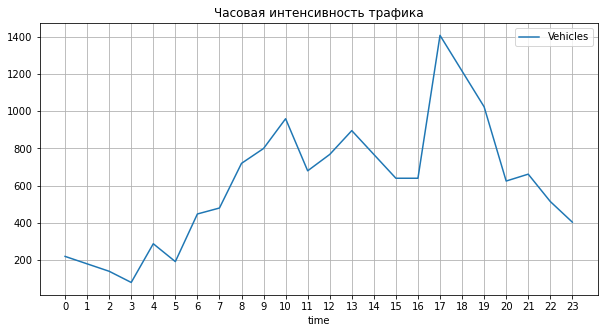

In [148]:
df_month[df_month['day'] == 6].plot(x='time', y='Vehicles')
plt.rcParams['figure.figsize'] = (10, 5)
plt.xticks(x[0:24:1])
plt.title("Часовая интенсивность трафика")
plt.grid()
plt.savefig("hour_intensity.jpg", dpi = 300)

In [149]:
df.to_csv("correct_bogi.csv", index=False)

In [159]:
#Vaqtga kerakli o'zgartirish kiritamiz.
#######################################################

df['DateTime'] = pd.to_datetime(df['DateTime'])
mark =(df['month'] != 6 | (df['month'] == 6) & (df['day'] < 10))
df_5 = df[mark]
df_y = df_5['Vehicles']
df_X = df_5.drop(['Vehicles', 'DateTime', 'year'], axis = 1)
df_X

#######################################################

,day,week,month,time
744,1,3,2,0
745,1,3,2,1
746,1,3,2,2
747,1,3,2,3
748,1,3,2,4
...,...,...,...,...
4337,30,5,6,17
4338,30,5,6,18
4339,30,5,6,19
4340,30,5,6,20


In [160]:
#Ma'lumotni bo'lamiz
#######################################################

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2)

#######################################################

In [163]:
# neyron tarmogini tashkil qilamiz va uning strukturasini chop etamiz
#######################################################
model = keras.Sequential([
    Dense(random.randint(1,128), input_shape=(4,), activation='relu'),
    Dense(random.randint(1,128), activation='relu'),
    Dense(random.randint(1,128), activation='relu'),
    Dense(random.randint(1,128), activation='relu'),
    Dense(random.randint(1,128), activation='relu'),
    Dense(random.randint(1,128), activation='relu'),
    Dense(1)   
])

print(model.summary())
#######################################################

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 126)               630       
                                                                 
 dense_39 (Dense)            (None, 19)                2413      
                                                                 
 dense_40 (Dense)            (None, 48)                960       
                                                                 
 dense_41 (Dense)            (None, 8)                 392       
                                                                 
 dense_42 (Dense)            (None, 18)                162       
                                                                 
 dense_43 (Dense)            (None, 15)                285       
                                                                 
 dense_44 (Dense)            (None, 1)                

In [185]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 56)                280       
                                                                 
 dense_46 (Dense)            (None, 80)                4560      
                                                                 
 dense_47 (Dense)            (None, 43)                3483      
                                                                 
 dense_48 (Dense)            (None, 91)                4004      
                                                                 
 dense_49 (Dense)            (None, 119)               10948     
                                                                 
 dense_50 (Dense)            (None, 17)                2040      
                                                                 
 dense_51 (Dense)            (None, 1)                

In [183]:
#Neyron sozlaymiz.
model.compile(loss='mean_absolute_error', optimizer='adam')

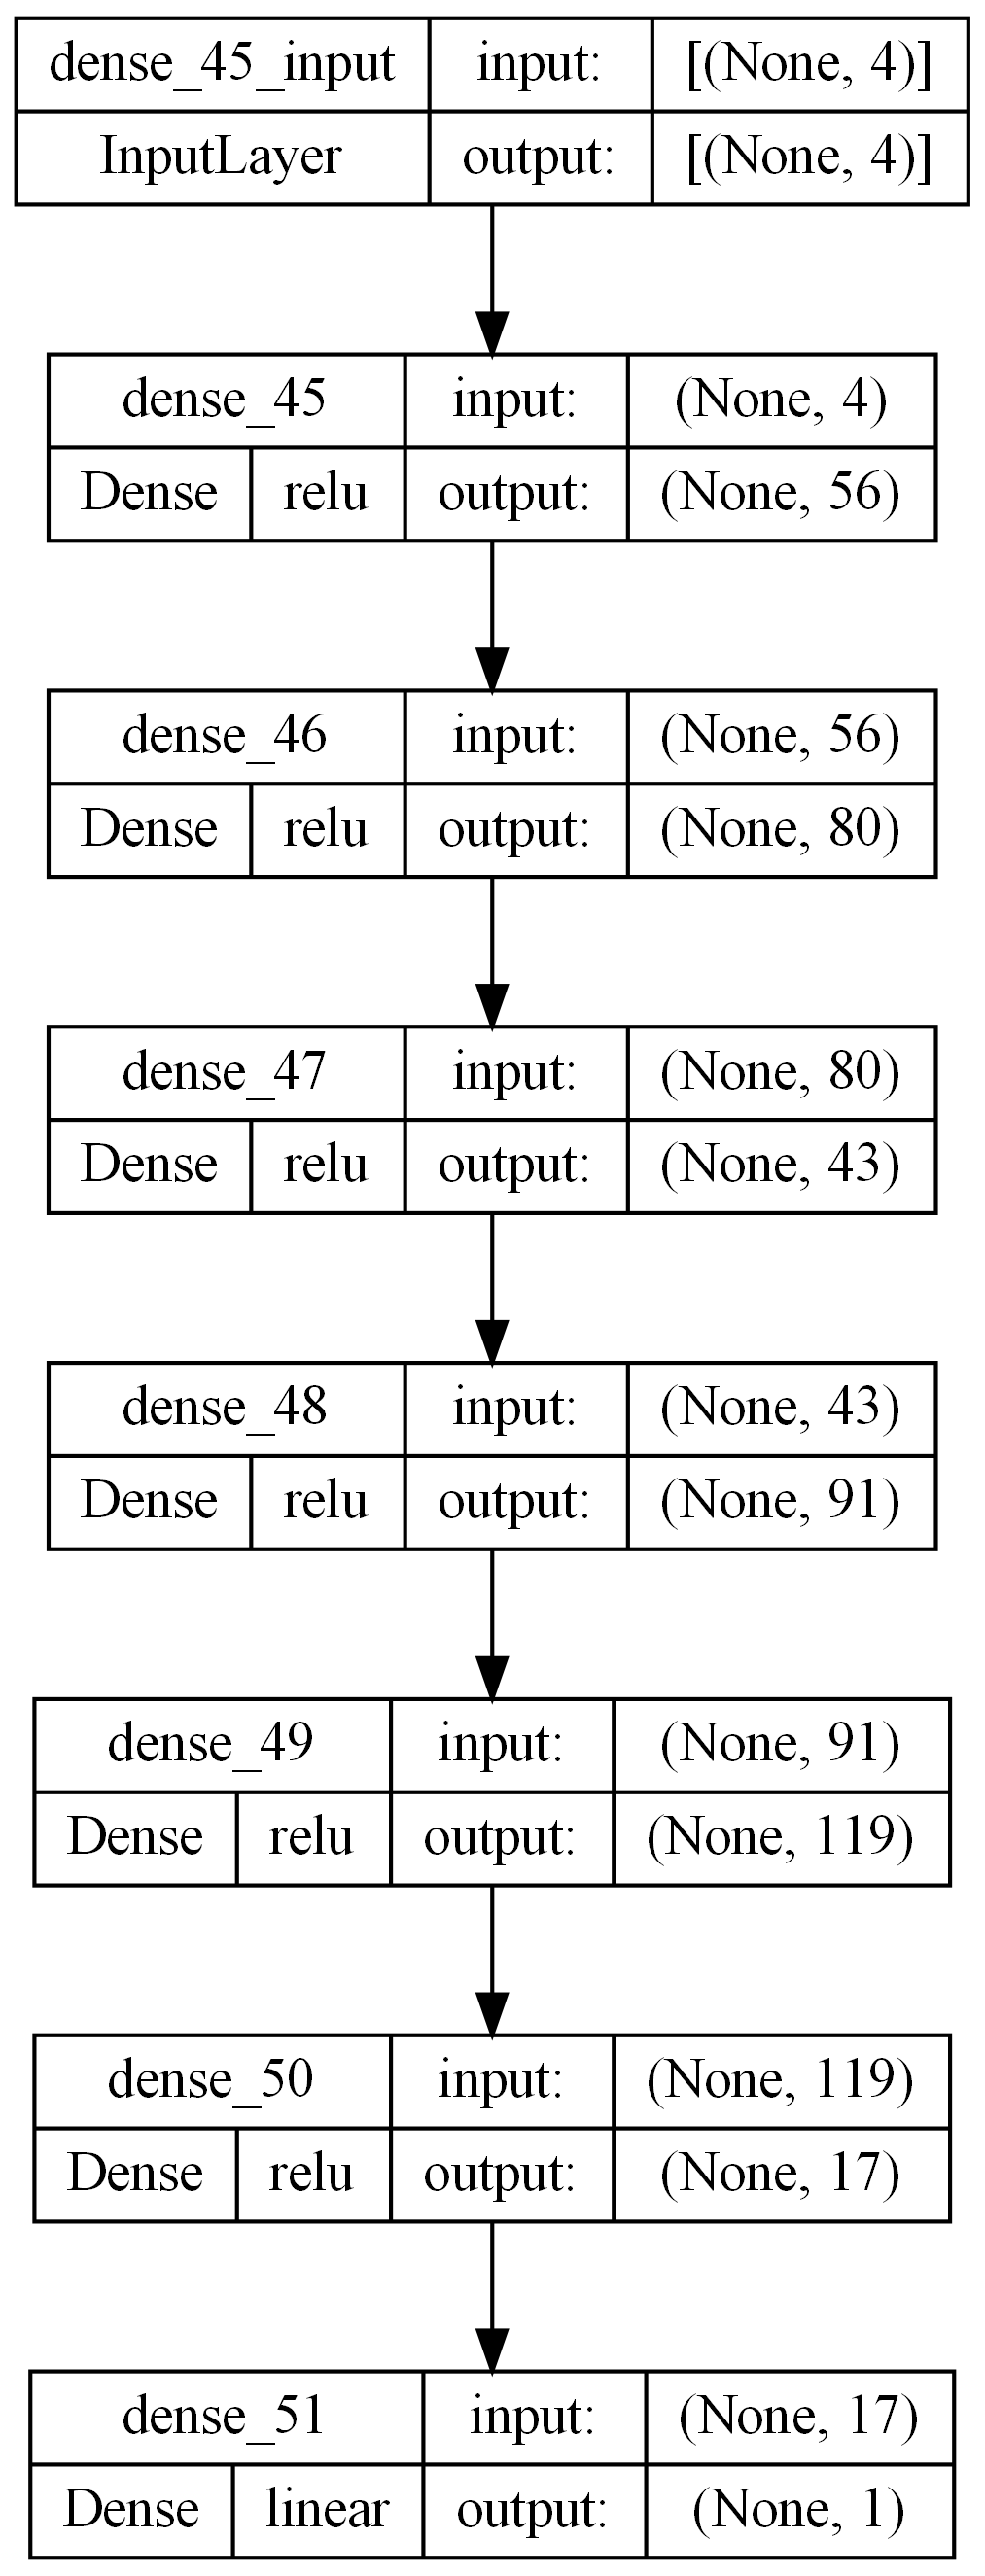

In [184]:
plot_model(model, to_file='model_plot.png', show_shapes=True, dpi=300,  show_layer_activations=True,expand_nested=True )

In [166]:
# Neyron tarmog'ini o'rgatamiz

fit = model.fit(X_train, y_train.to_numpy(), epochs=300, validation_split=0.2, validation_data=(X_test, y_test))


Epoch 1/300
90/90 [==============================] - 1s 3ms/step - loss: 452.7452 - val_loss: 296.1545
Epoch 2/300
90/90 [==============================] - 0s 2ms/step - loss: 288.0155 - val_loss: 285.4751
Epoch 3/300
90/90 [==============================] - 0s 2ms/step - loss: 280.5613 - val_loss: 284.6844
Epoch 4/300
90/90 [==============================] - 0s 2ms/step - loss: 276.1953 - val_loss: 273.2448
Epoch 5/300
90/90 [==============================] - 0s 4ms/step - loss: 270.4318 - val_loss: 268.4378
Epoch 6/300
90/90 [==============================] - 0s 3ms/step - loss: 263.3831 - val_loss: 274.0368
Epoch 7/300
90/90 [==============================] - 0s 3ms/step - loss: 264.0705 - val_loss: 258.4550
Epoch 8/300
90/90 [==============================] - 0s 3ms/step - loss: 254.9976 - val_loss: 255.1439
Epoch 9/300
90/90 [==============================] - 0s 3ms/step - loss: 255.3584 - val_loss: 257.5226
Epoch 10/300
90/90 [==============================] - 0s 4ms/step - loss:

In [167]:
y_pred = model.predict(X_test)

23/23 [==============================] - 0s 1ms/step


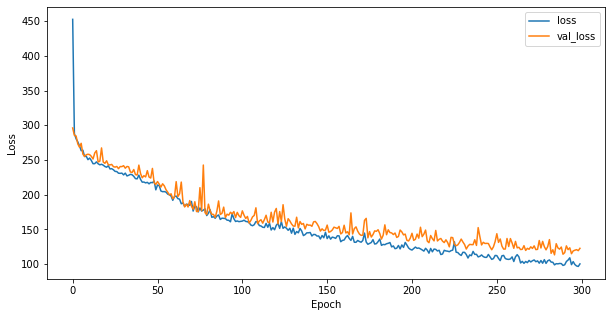

In [168]:
plt.plot(fit.history['loss'], label='loss')
plt.plot(fit.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [169]:
# plt.plot(fit.history['accuracy'], label='accuracy')
# plt.plot(fit.history['val_accuracy'], label='val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [186]:
model.save('model_bogi.h5')

In [170]:
loss = model.evaluate(X_test, y_test)
loss

23/23 [==============================] - 0s 793us/step - loss: 122.6515


122.65150451660156

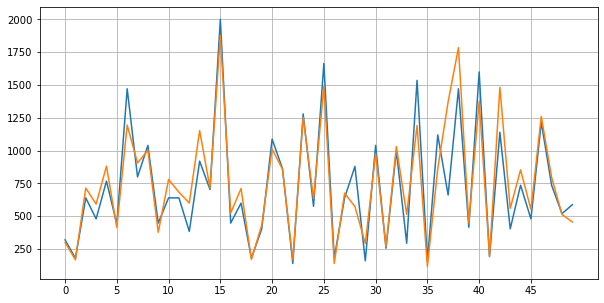

In [171]:
x=[i for i in range(1088)]
plt.plot(x[:50], y_test[:50])
plt.plot(x[:50], y_pred[:50])
plt.rcParams['figure.figsize'] = (10, 5)
plt.xticks(x[0:50:5])
plt.grid()
plt.show()

In [172]:
train_error_score = metrics.r2_score(y_test, y_pred)
print("R squared Error - Training for Y_test : ", train_error_score)

R squared Error - Training for Y_test :  0.8547558495772382


In [173]:
#yuqoridagi ma'lumotni tekshirish uchun boshqa train va testda ishtrok etmagan ma'lumotni beramiz
#######################################################

df_6 = df[(df['month'] == 6) & (df['day'] == 11)]
df_yp = df_6['Vehicles']
df_Xp = df_6.drop(['Vehicles', 'DateTime', 'year'], axis = 1)

#######################################################

In [174]:

#######################################################
Xp_test = df_Xp
#######################################################

In [175]:
#ma'lumotni bashorat natijasini olamiz
#######################################################
yp_pred = model.predict(Xp_test)
#######################################################

1/1 [==============================] - 0s 13ms/step


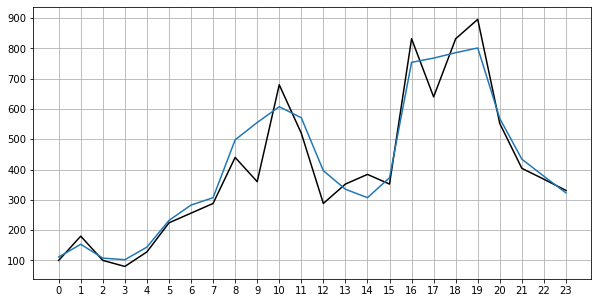

In [179]:
#bashoratni grafigini chop etamiz
#######################################################

plt.plot(x[:24], df_yp[:24], color='black')
plt.plot(x[:24], yp_pred[:24])
plt.rcParams['figure.figsize'] = (10, 5)
plt.xticks(x[0:24:1])
plt.grid()
plt.show()

#######################################################

In [177]:
train_error_score = metrics.r2_score(df_yp, yp_pred)
print("R squared Error - Training for Y_test : ", train_error_score)

R squared Error - Training for Y_test :  0.9181833462807155


In [81]:
# kirayotgan ma'lumotlarni masshtabini o'zgartiramiz.
#######################################################
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
#######################################################

In [82]:
X_train_scaled

array([[0.73333333, 1.        , 0.75      , 0.        ],
       [0.13333333, 1.        , 0.5       , 0.2173913 ],
       [0.96666667, 1.        , 0.75      , 0.91304348],
       ...,
       [0.4       , 0.66666667, 0.        , 0.04347826],
       [0.96666667, 0.5       , 0.5       , 0.34782609],
       [0.06666667, 0.16666667, 0.        , 0.34782609]])

In [83]:
# neyron tarmogini tashkil qilamiz va uning strukturasini chop etamiz
#######################################################
model2 = keras.Sequential([
    Dense(random.randint(1,128), input_shape=(4,), activation='relu'),
    Dense(random.randint(1,128), activation='relu'),
    Dense(random.randint(1,128), activation='relu'),
    Dense(random.randint(1,128), activation='relu'),
    Dense(random.randint(1,128), activation='relu'),
    Dense(random.randint(1,128), activation='relu'),
    Dense(1)   
])

print(model2.summary())
#######################################################

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 36)                180       
                                                                 
 dense_9 (Dense)             (None, 85)                3145      
                                                                 
 dense_10 (Dense)            (None, 36)                3096      
                                                                 
 dense_11 (Dense)            (None, 97)                3589      
                                                                 
 dense_12 (Dense)            (None, 19)                1862      
                                                                 
 dense_13 (Dense)            (None, 24)                480       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [84]:
#Neyron sozlaymiz.
model2.compile(loss='mean_absolute_error', optimizer='adam')

In [99]:
# Neyron tarmog'ini o'rgatamiz
fit = model2.fit(X_train_scaled, y_train.to_numpy(), epochs=random.randint(100, 500), validation_split=0.2)

Epoch 1/296
73/73 [==============================] - 0s 2ms/step - loss: 121.1771 - val_loss: 134.6284
Epoch 2/296
73/73 [==============================] - 0s 2ms/step - loss: 122.9259 - val_loss: 129.7520
Epoch 3/296
73/73 [==============================] - 0s 2ms/step - loss: 125.2679 - val_loss: 128.9300
Epoch 4/296
73/73 [==============================] - 0s 2ms/step - loss: 120.1565 - val_loss: 135.1095
Epoch 5/296
73/73 [==============================] - 0s 2ms/step - loss: 123.3825 - val_loss: 131.0398
Epoch 6/296
73/73 [==============================] - 0s 2ms/step - loss: 122.3034 - val_loss: 132.9298
Epoch 7/296
73/73 [==============================] - 0s 3ms/step - loss: 119.0319 - val_loss: 135.4029
Epoch 8/296
73/73 [==============================] - 0s 3ms/step - loss: 124.0818 - val_loss: 134.0651
Epoch 9/296
73/73 [==============================] - 0s 3ms/step - loss: 119.9513 - val_loss: 136.8070
Epoch 10/296
73/73 [==============================] - 0s 3ms/step - loss:

In [86]:
#ma'lumotni bashorat natijasini olamiz
#######################################################
yp_pred_sc = model2.predict(X_test_scaled)
#######################################################

23/23 [==============================] - 0s 1ms/step


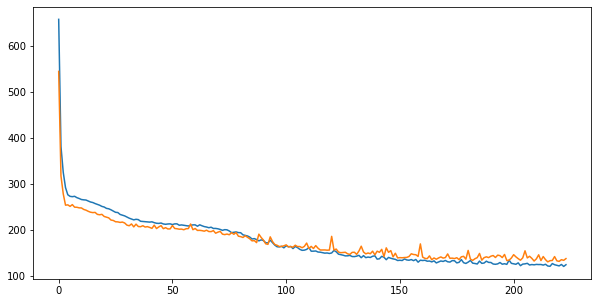

In [87]:
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])

In [88]:
train_error_score = metrics.r2_score(y_test, yp_pred_sc)
print("R squared Error - Training for Y_test : ", train_error_score)

R squared Error - Training for Y_test :  0.8225407415500607


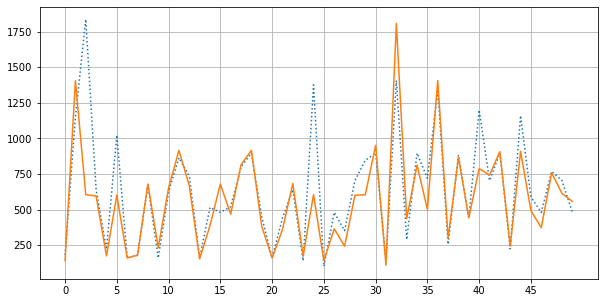

In [89]:
x=[i for i in range(1088)]
plt.plot(x[:50], y_test[:50], ':')
plt.plot(x[:50], yp_pred_sc[:50])
plt.rcParams['figure.figsize'] = (20, 5)
plt.xticks(x[0:50:5])
plt.grid()
plt.show()

In [90]:
#ma'lumotni masshtablaymiz
#######################################################
Xp_test_scaled = scaler.fit_transform(df_Xp)
#######################################################

In [91]:
#ma'lumotni bashorat natijasini olamiz
#######################################################
y_pred_sc = model2.predict(Xp_test_scaled)
#######################################################

1/1 [==============================] - 0s 15ms/step


In [92]:
train_error_score = metrics.r2_score(df_yp, y_pred_sc)
print("R squared Error - Training for Y_test : ", train_error_score)

R squared Error - Training for Y_test :  0.8052205382363734


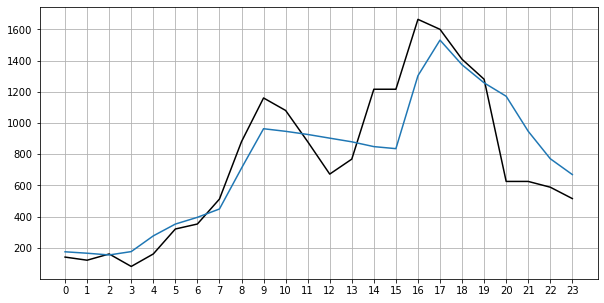

In [94]:
#bashoratni grafigini chop etamiz
#######################################################

plt.plot(x[:24], df_yp[:24], color='black')
plt.plot(x[:24], y_pred_sc[:24])
plt.rcParams['figure.figsize'] = (10, 5)
plt.xticks(x[0:24:1])
plt.grid()
plt.show()

#######################################################

In [97]:
#yuqoridagi ma'lumotni tekshirish uchun boshqa train va testda ishtrok etmagan ma'lumotni beramiz
#######################################################

df_6 = df[(df['month'] == 6) & (df['day'] == 2)]
df_yp = df_6['Vehicles']
df_Xp = df_6.drop(['Vehicles', 'DateTime', 'year'], axis = 1)

#######################################################
#ma'lumotni masshtablaymiz
#######################################################
Xp_test_scaled = scaler.fit_transform(df_Xp)
#######################################################
#ma'lumotni bashorat natijasini olamiz
#######################################################
y_pred_sc = model2.predict(Xp_test_scaled)
#######################################################
train_error_score = metrics.r2_score(df_yp, y_pred_sc)
print("R squared Error - Training for Y_test : ", train_error_score)

1/1 [==============================] - 0s 25ms/step
R squared Error - Training for Y_test :  0.5894920713162166


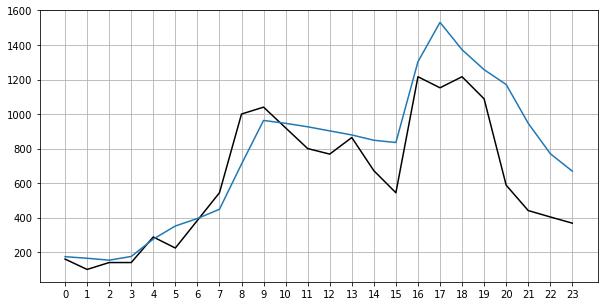

In [98]:
#bashoratni grafigini chop etamiz
#######################################################

plt.plot(x[:24], df_yp[:24], color='black')
plt.plot(x[:24], y_pred_sc[:24])
plt.rcParams['figure.figsize'] = (10, 5)
plt.xticks(x[0:24:1])
plt.grid()
plt.show()

#######################################################